In [22]:
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd

In [23]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


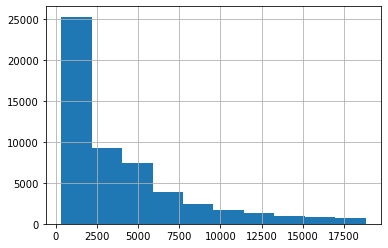

In [24]:
diamonds['price'].hist();

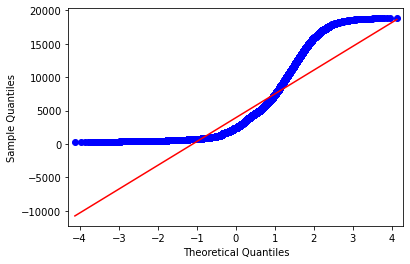

In [25]:
# check qq against normal
sm.qqplot(diamonds['price'], line='r');

<AxesSubplot:>

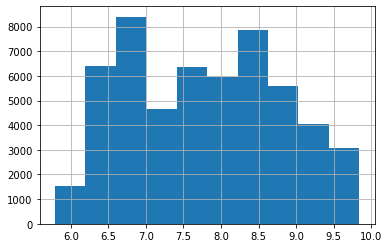

In [26]:
# histogram of log-transformed target
np.log(diamonds['price']).hist()

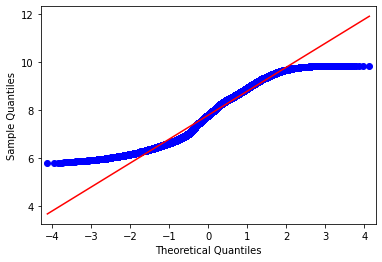

In [27]:
#plot of log-transformed target

sm.qqplot(np.log(diamonds['price']), line='r');

In [28]:
# set up x, y and lr

X = diamonds[['carat']]
y = diamonds['price']
lr = LinearRegression().fit(X, y)

In [29]:
# store model prediction
preds = lr.predict(X)

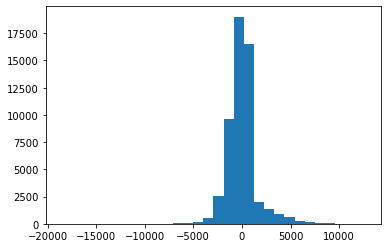

In [31]:
#check tHe histogram of the residuals
resids = y - preds
fig, ax = plt.subplots()
ax.hist(resids, bins=30);


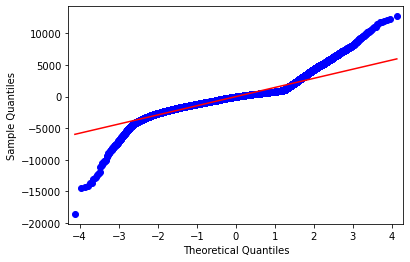

In [32]:
#check qqplot
sm.qqplot(resids, line='r');

In [33]:
#build a new model on transformed target
log_target = np.log(y)

log_lr = LinearRegression().fit(X, log_target)


In [34]:
# store predictions
log_preds = log_lr.predict(X)

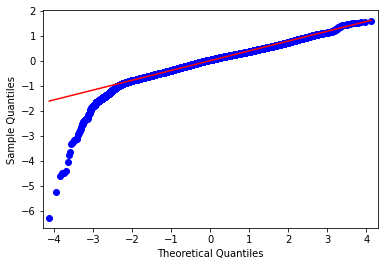

In [35]:
sm.qqplot(log_target - log_preds, line='r');

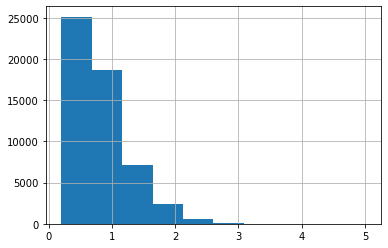

In [37]:
# what about the shape of our predictors

diamonds['carat'].hist();

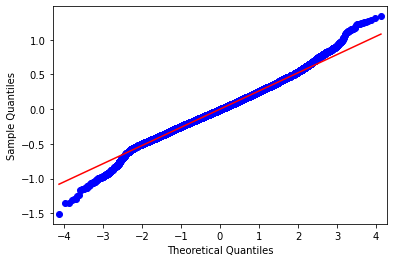

In [40]:
#log_transform the predictor
log_carat = np.log(X)
two_logs_lr = LinearRegression().fit(log_carat, log_target)
two_logs_preds = two_logs_lr.predict(log_carat)
sm.qqplot(np.log(y) - two_logs_preds, line='r');
